# Position and Momentum Representation
**Lecture: 21.04.15**

## Quantum Motion on the Real Line

We consider the motion of a quantum particle on a one-dimensional line \( \mathbb{R} \). The position operator \( \hat{x} \) is Hermitian, and its eigenstates \( |x\rangle \) satisfy:

\[
\hat{x}|x\rangle = x|x\rangle.
\]

Probability of finding a particle at \( x \) in the state \( |x'\rangle \) is \( |\langle x | x' \rangle|^2 \). These satisfy:

\[
\langle x'|x\rangle = \delta(x - x').
\]

Completeness:

\[
\int dx |x\rangle \langle x| = \hat{I}.
\]



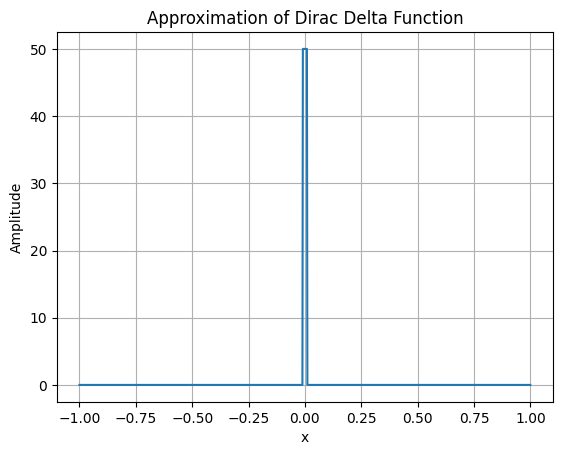

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 1000)
delta_approx = np.where(np.abs(x) < 0.01, 1 / 0.02, 0)

plt.plot(x, delta_approx)
plt.title("Approximation of Dirac Delta Function")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


## Momentum from Symmetry

Define translation operator:

\[
\hat{T}(\Delta x)|x\rangle = |x + \Delta x\rangle
\]

For small \( \Delta x \):

\[
\hat{T}(\Delta x) = I - \frac{i}{\hbar} \Delta x \hat{P}
\]

This leads to the identification:

\[
\hat{P} = -i\hbar \frac{\partial}{\partial x}
\]

And the canonical commutation relation:

\[
[\hat{x}, \hat{P}] = i\hbar
\]


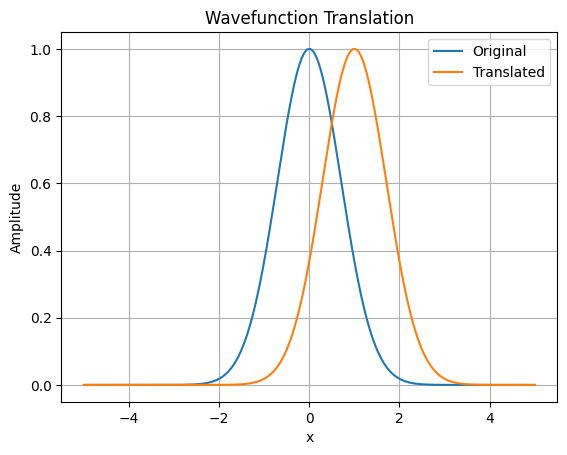

In [2]:
x = np.linspace(-5, 5, 1000)
psi = np.exp(-x**2)
dx = 1.0
psi_translated = np.exp(-(x - dx)**2)

plt.plot(x, psi, label="Original")
plt.plot(x, psi_translated, label="Translated")
plt.title("Wavefunction Translation")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


## Momentum Eigenstates and Fourier Transform

Momentum eigenstates:

\[
\hat{P}|p\rangle = p|p\rangle, \quad \langle x|p\rangle = \frac{1}{\sqrt{2\pi\hbar}} e^{ipx/\hbar}
\]

Fourier transforms:

\[
\phi(p) = \frac{1}{\sqrt{2\pi\hbar}} \int dx\, \psi(x) e^{-ipx/\hbar}, \quad
\psi(x) = \frac{1}{\sqrt{2\pi\hbar}} \int dp\, \phi(p) e^{ipx/\hbar}
\]


## Example: Step Function

\[
\psi(x) = \begin{cases}
0 & |x| > \frac{a}{2} \\
\frac{1}{\sqrt{a}} & |x| \leq \frac{a}{2}
\end{cases}
\]

Fourier transform gives:

\[
\phi(p) = \sqrt{\frac{2\hbar}{a\pi}} \cdot \frac{1}{p} \sin\left(\frac{pa}{2\hbar}\right)
\]

Uncertainty:

\[
\Delta x \cdot \Delta p \sim \hbar
\]


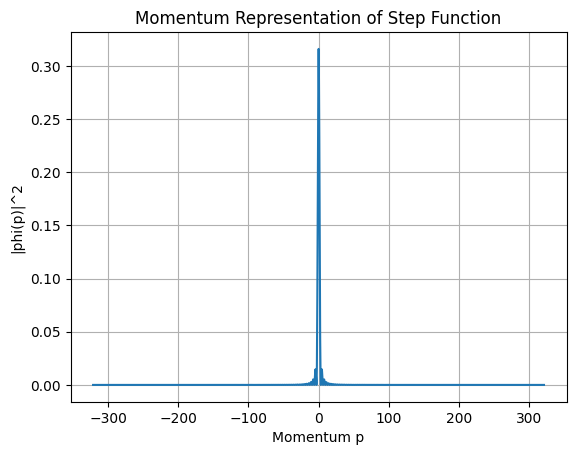

In [3]:
from numpy.fft import fft, fftshift, fftfreq

a = 2
x = np.linspace(-10, 10, 2048)
psi = np.where(np.abs(x) <= a/2, 1/np.sqrt(a), 0)

dx = x[1] - x[0]
phi = fftshift(fft(psi)) * dx / np.sqrt(2 * np.pi)
p = fftshift(fftfreq(len(x), d=dx)) * 2 * np.pi

plt.plot(p, np.abs(phi)**2)
plt.title("Momentum Representation of Step Function")
plt.xlabel("Momentum p")
plt.ylabel("|phi(p)|^2")
plt.grid(True)
plt.show()


## Example: Harmonic Oscillator Ground State

\[
\psi_0(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} e^{-\frac{m\omega}{2\hbar}x^2}
\]


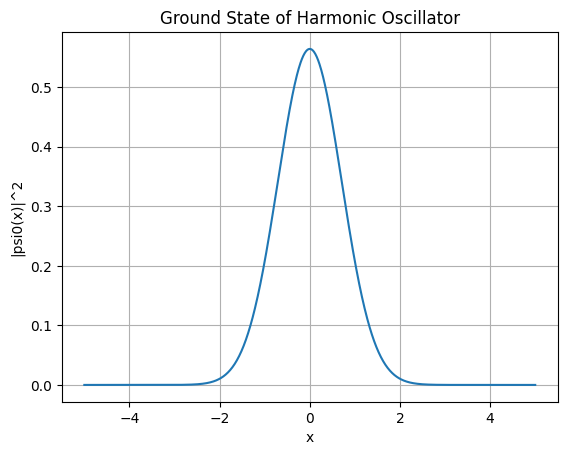

In [4]:
m = 1.0
omega = 1.0
hbar = 1.0

x = np.linspace(-5, 5, 1000)
psi0 = (m * omega / (np.pi * hbar))**0.25 * np.exp(-m * omega * x**2 / (2 * hbar))

plt.plot(x, psi0**2)
plt.title("Ground State of Harmonic Oscillator")
plt.xlabel("x")
plt.ylabel("|psi0(x)|^2")
plt.grid(True)
plt.show()
